Q.1 & Q.2 Solution

The following block of code below utilises an image segmentation model to identify the various kinds of objects and walls in an image of a floor plan.

The model used is trained on CubiCasa dataset, and is a Google colabe running version of 'samples.ipynb', available at https://github.com/CubiCasa/CubiCasa5k

Downloading the repository

In [1]:
!git clone https://github.com/CubiCasa/CubiCasa5k.git   

Cloning into 'CubiCasa5k'...
remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 81 (delta 4), reused 0 (delta 0), pack-reused 72
Unpacking objects: 100% (81/81), done.


In [2]:
import os

In [3]:
os.chdir('CubiCasa5k')

Instaling necessary libraries

In [4]:
!pip install -r requirements.txt

     |████████████████████████████████| 102kB 3.6MB/s 
     |████████████████████████████████| 163kB 6.7MB/s 
     |████████████████████████████████| 153kB 6.2MB/s 
     |████████████████████████████████| 430kB 8.8MB/s 
     |████████████████████████████████| 2.1MB 12.5MB/s 
     |████████████████████████████████| 2.1MB 53.9MB/s 
     |████████████████████████████████| 706kB 60.3MB/s 
     |████████████████████████████████| 2.8MB 59.1MB/s 
     |████████████████████████████████| 61kB 10.1MB/s 
     |████████████████████████████████| 122kB 57.4MB/s 
     |████████████████████████████████| 778kB 58.6MB/s 
     |████████████████████████████████| 184kB 55.3MB/s 
     |████████████████████████████████| 133kB 52.3MB/s 
     |████████████████████████████████| 286kB 58.6MB/s 
     |████████████████████████████████| 61kB 11.2MB/s 
     |████████████████████████████████| 92kB 12.2MB/s 
     |████████████████████████████████| 133kB 66.9MB/s 
     |████████████████████████████████| 14.7MB 181kB/s 

Downloading a bunch of images of floorplan images, to demonstrate the performance of model on them.
This command below downloads a mini sample of the validation dataset, part of the CubiCasa Dataset. The validation dataset was not used to train this model.
The minisample is hosted on my Google Drive and consists of 6 random floorplans from the validation dataset.

In [5]:
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=13x_D3GRdxurKFT8spZIOCn3rqZobFFHy' -O data.zip

--2020-09-09 18:47:49--  https://docs.google.com/uc?export=download&id=13x_D3GRdxurKFT8spZIOCn3rqZobFFHy
Resolving docs.google.com (docs.google.com)... 173.194.203.138, 173.194.203.100, 173.194.203.101, ...
Connecting to docs.google.com (docs.google.com)|173.194.203.138|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-10-ak-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/hufrouufthlnroaijjf72qcst7rl5hh2/1599677250000/17449735085288012097/*/13x_D3GRdxurKFT8spZIOCn3rqZobFFHy?e=download [following]
--2020-09-09 18:47:51--  https://doc-10-ak-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/hufrouufthlnroaijjf72qcst7rl5hh2/1599677250000/17449735085288012097/*/13x_D3GRdxurKFT8spZIOCn3rqZobFFHy?e=download
Resolving doc-10-ak-docs.googleusercontent.com (doc-10-ak-docs.googleusercontent.com)... 74.125.142.132, 2607:f8b0:400e:c08::84
Connecting to doc-10-ak-docs.googleusercontent.com (doc-10-

In [6]:
!unzip data.zip

Archive:  data.zip
   creating: data/cubicasa5k/
   creating: data/cubicasa5k/high_quality_architectural/
   creating: data/cubicasa5k/high_quality_architectural/1191/
  inflating: data/cubicasa5k/high_quality_architectural/1191/F1_original.png  
  inflating: data/cubicasa5k/high_quality_architectural/1191/F1_scaled.png  
  inflating: data/cubicasa5k/high_quality_architectural/1191/model.svg  
   creating: data/cubicasa5k/high_quality_architectural/22/
  inflating: data/cubicasa5k/high_quality_architectural/22/F1_original.png  
  inflating: data/cubicasa5k/high_quality_architectural/22/F1_scaled.png  
  inflating: data/cubicasa5k/high_quality_architectural/22/model.svg  
   creating: data/cubicasa5k/high_quality_architectural/2207/
  inflating: data/cubicasa5k/high_quality_architectural/2207/F1_original.png  
  inflating: data/cubicasa5k/high_quality_architectural/2207/F1_scaled.png  
  inflating: data/cubicasa5k/high_quality_architectural/2207/model.svg  
   creating: data/cubicasa5k/

Downloading the pretrained model made available along with the forementioned repository

In [7]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1gRB7ez1e4H7a9Y09lLqRuna0luZO5VRK' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1gRB7ez1e4H7a9Y09lLqRuna0luZO5VRK" -O t.pkl && rm -rf /tmp/cookies.txt

--2020-09-09 18:47:59--  https://docs.google.com/uc?export=download&confirm=WrFw&id=1gRB7ez1e4H7a9Y09lLqRuna0luZO5VRK
Resolving docs.google.com (docs.google.com)... 74.125.195.100, 74.125.195.101, 74.125.195.139, ...
Connecting to docs.google.com (docs.google.com)|74.125.195.100|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0c-5g-docs.googleusercontent.com/docs/securesc/1mk3lgevfqu89j4jah4er61kt6lbgpni/deic2a3lti08ridlpnnjt8pv14ldr4v1/1599677250000/05431039146205173256/09396649492801234763Z/1gRB7ez1e4H7a9Y09lLqRuna0luZO5VRK?e=download [following]
--2020-09-09 18:47:59--  https://doc-0c-5g-docs.googleusercontent.com/docs/securesc/1mk3lgevfqu89j4jah4er61kt6lbgpni/deic2a3lti08ridlpnnjt8pv14ldr4v1/1599677250000/05431039146205173256/09396649492801234763Z/1gRB7ez1e4H7a9Y09lLqRuna0luZO5VRK?e=download
Resolving doc-0c-5g-docs.googleusercontent.com (doc-0c-5g-docs.googleusercontent.com)... 74.125.142.132, 2607:f8b0:400e:c08::84
Connecting

In [8]:
%matplotlib inline
from skimage import transform
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import torch
import torch.nn.functional as F
from torch.utils.data import DataLoader
from floortrans.models import get_model
from floortrans.loaders import FloorplanSVG, DictToTensor, Compose, RotateNTurns
from floortrans.plotting import segmentation_plot, polygons_to_image, draw_junction_from_dict, discrete_cmap
discrete_cmap()
from floortrans.post_prosessing import split_prediction, get_polygons, split_validation
from mpl_toolkits.axes_grid1 import AxesGrid

rot = RotateNTurns()
room_classes = ["Background", "Outdoor", "Wall", "Kitchen", "Living Room" ,"Bed Room", "Bath", "Entry", "Railing", "Storage", "Garage", "Undefined"]
icon_classes = ["No Icon", "Window", "Door", "Closet", "Electrical Applience" ,"Toilet", "Sink", "Sauna Bench", "Fire Place", "Bathtub", "Chimney"]

data_folder = 'data/cubicasa5k/'
data_file = 'test.txt'

In [9]:
normal_set = FloorplanSVG(data_folder, data_file, format='txt', original_size=True)
data_loader = DataLoader(normal_set, batch_size=1, num_workers=0)
data_iter = iter(data_loader)
# Setup Model
model = get_model('hg_furukawa_original', 51)

n_classes = 44
split = [21, 12, 11]
model.conv4_ = torch.nn.Conv2d(256, n_classes, bias=True, kernel_size=1)
model.upsample = torch.nn.ConvTranspose2d(n_classes, n_classes, kernel_size=4, stride=4)


In [10]:
checkpoint = torch.load('t.pkl')

model.load_state_dict(checkpoint['model_state'])
model.eval()
model.cuda()
print("Model loaded.")

Model loaded.


The following code block picks the first floor plan image from the downloaded mini sample and displays it.

To view and run the model on the next image, run all the code from this point onwards again, once the below code block is run. The below code blocks iterates in the 6 downloaded images.

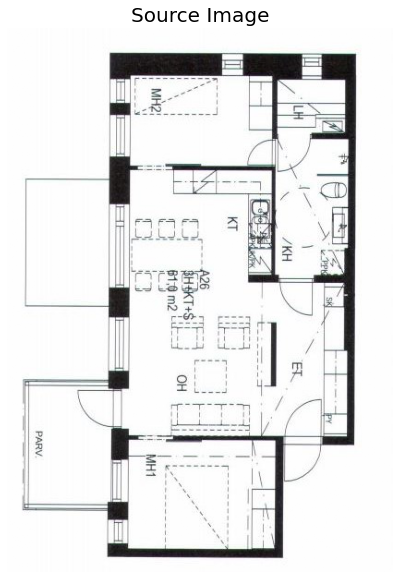

In [19]:
val = next(data_iter)
junctions = val['heatmaps']
folder = val['folder'][0]
image = val['image'].cuda()
label = val['label']
np_img = np.moveaxis(image[0].cpu().data.numpy(), 0, -1) / 2 + 0.5
plt.figure(figsize=(10,10))
plt.title('Source Image', fontsize=20)
plt.axis('off')
plt.imshow(np_img)
plt.show()

## The SVG floorplan

## Parsed labels
The below code block displays the labels of various objects as labelled in the dataset.
The various kinds of objects are represented by different colours in at their associated positions in the original floorplan image.

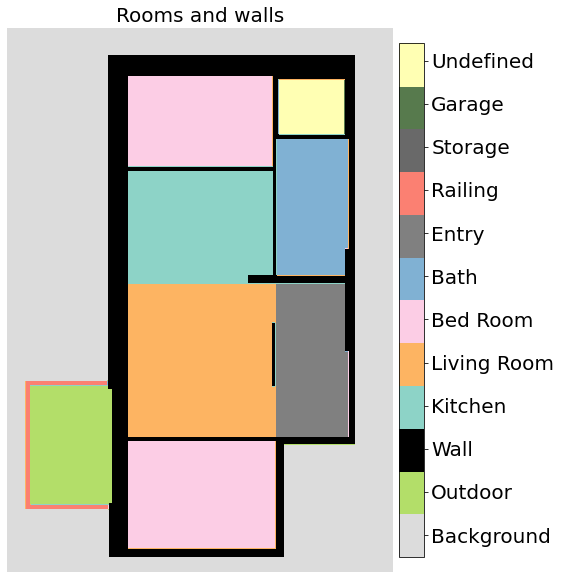

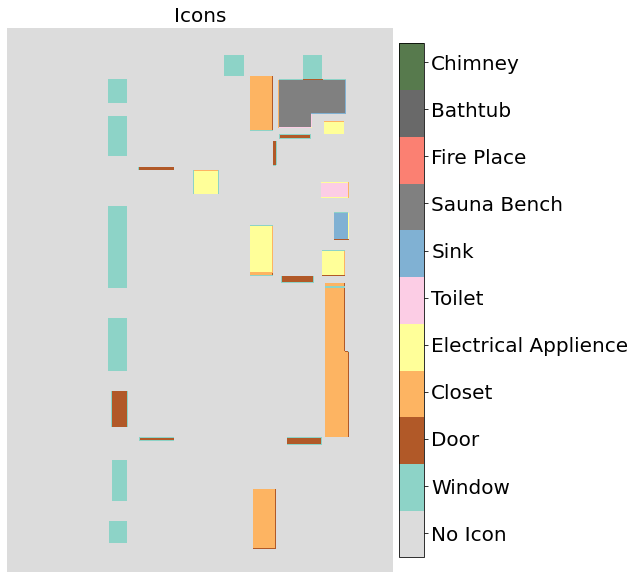

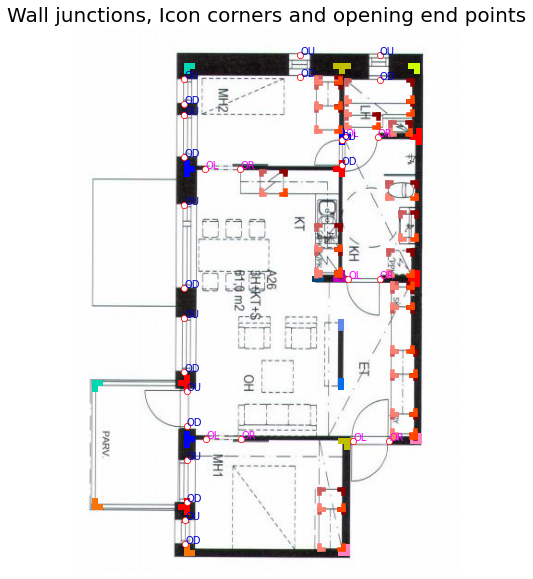

In [20]:
label_np = label.data.numpy()[0]
plt.figure(figsize=(10,10))
ax = plt.subplot(1, 1, 1)
plt.title('Rooms and walls', fontsize=20)
ax.axis('off')
n_rooms = 12
rseg = ax.imshow(label_np[0], cmap='rooms', vmin=0, vmax=n_rooms-0.1)
cbar = plt.colorbar(rseg, ticks=np.arange(n_rooms) + 0.5, fraction=0.046, pad=0.01)
cbar.ax.set_yticklabels(room_classes, fontsize=20)
plt.show()

plt.figure(figsize=(10,10))
ax = plt.subplot(1, 1, 1)
plt.title('Icons', fontsize=20)
ax.axis('off')
n_icons = 11
iseg = ax.imshow(label_np[1], cmap='icons', vmin=0, vmax=n_icons-0.1)
cbar = plt.colorbar(iseg, ticks=np.arange(n_icons) + 0.5, fraction=0.046, pad=0.01)
cbar.ax.set_yticklabels(icon_classes, fontsize=20)
plt.show()

plt.figure(figsize=(10,10))
ax = plt.subplot(1, 1, 1)
plt.title('Wall junctions, Icon corners and opening end points', fontsize=20)
ax.axis('off')
ax.imshow(np_img)
h, w, _ = np_img.shape
draw_junction_from_dict(junctions, w, h, size=0.3, fontsize=10)
plt.show()

## Networks prediction for the segmentation
Running the model on given floorplan image

The below code block shows the unprocessed predictions of the model on the image.

The numpy array 'rooms_pred' contains the prediction of architectural elements.
The numpy array 'icons_pred' contains the prediction of objects in the floor plan.

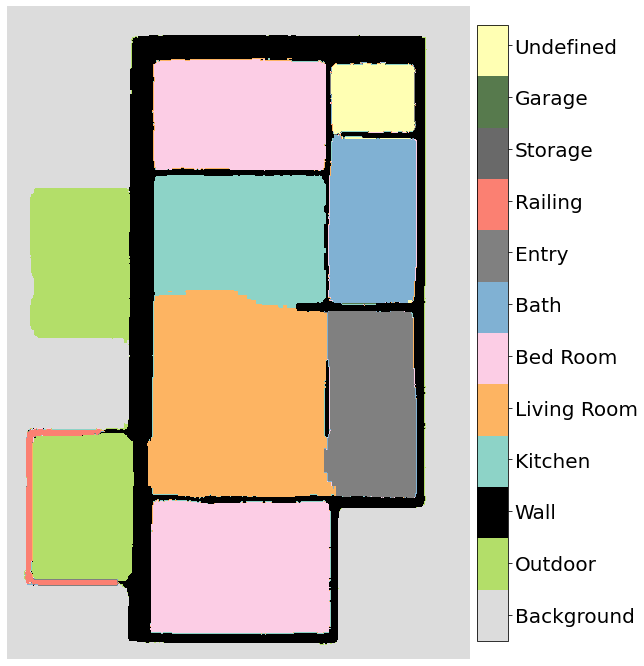

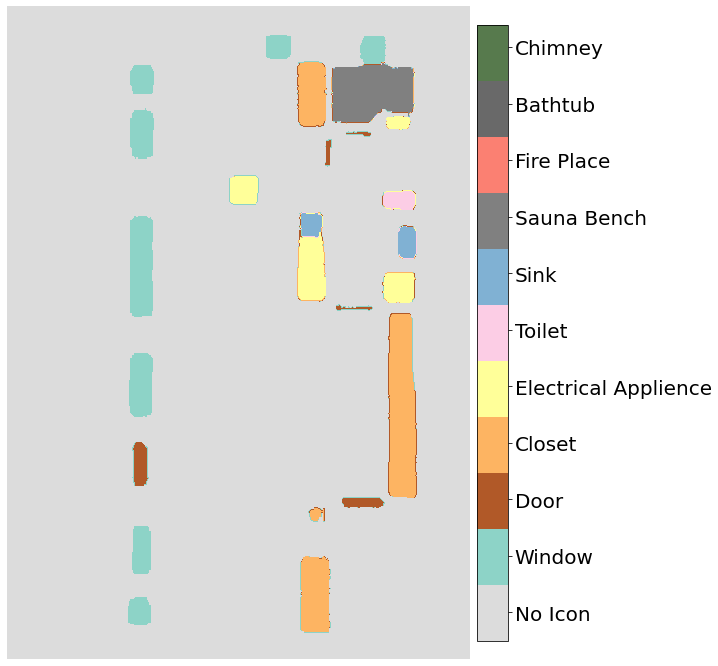

In [21]:
with torch.no_grad():
    height = label_np.shape[1]
    width = label_np.shape[2]
    img_size = (height, width)
    
    rotations = [(0, 0), (1, -1), (2, 2), (-1, 1)]
    pred_count = len(rotations)
    prediction = torch.zeros([pred_count, n_classes, height, width])
    for i, r in enumerate(rotations):
        forward, back = r
        # We rotate first the image
        rot_image = rot(image, 'tensor', forward)
        pred = model(rot_image)
        # We rotate prediction back
        pred = rot(pred, 'tensor', back)
        # We fix heatmaps
        pred = rot(pred, 'points', back)
        # We make sure the size is correct
        pred = F.interpolate(pred, size=(height, width), mode='bilinear', align_corners=True)
        # We add the prediction to output
        prediction[i] = pred[0]

prediction = torch.mean(prediction, 0, True)
rooms_label = label_np[0]
icons_label = label_np[1]

rooms_pred = F.softmax(prediction[0, 21:21+12], 0).cpu().data.numpy()
rooms_pred = np.argmax(rooms_pred, axis=0)

icons_pred = F.softmax(prediction[0, 21+12:], 0).cpu().data.numpy()
icons_pred = np.argmax(icons_pred, axis=0)

plt.figure(figsize=(12,12))
ax = plt.subplot(1, 1, 1)
ax.axis('off')
rseg = ax.imshow(rooms_pred, cmap='rooms', vmin=0, vmax=n_rooms-0.1)
cbar = plt.colorbar(rseg, ticks=np.arange(n_rooms) + 0.5, fraction=0.046, pad=0.01)
cbar.ax.set_yticklabels(room_classes, fontsize=20)
plt.show()

plt.figure(figsize=(12,12))
ax = plt.subplot(1, 1, 1)
ax.axis('off')
iseg = ax.imshow(icons_pred, cmap='icons', vmin=0, vmax=n_icons-0.1)
cbar = plt.colorbar(iseg, ticks=np.arange(n_icons) + 0.5, fraction=0.046, pad=0.01)
cbar.ax.set_yticklabels(icon_classes, fontsize=20)
plt.show()

## Post-processed polygons

Below code block displays the final processed results of model's predictions. The location of each object and walls is clearly marked with distinct values in 
numpy arrays.

'pol_room_seg' contains the architectural features incuding the walls.
'pol_icon_seg' contains the objects in the floorplan.

both of these can be used to identify the location of the walls and presence, count and locations of floor plan objects.

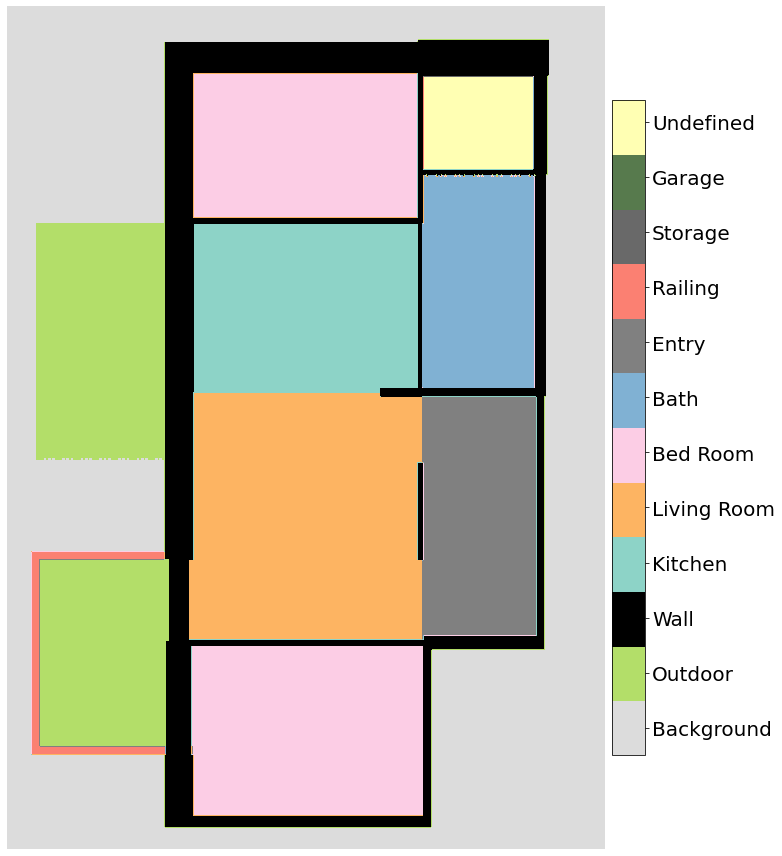

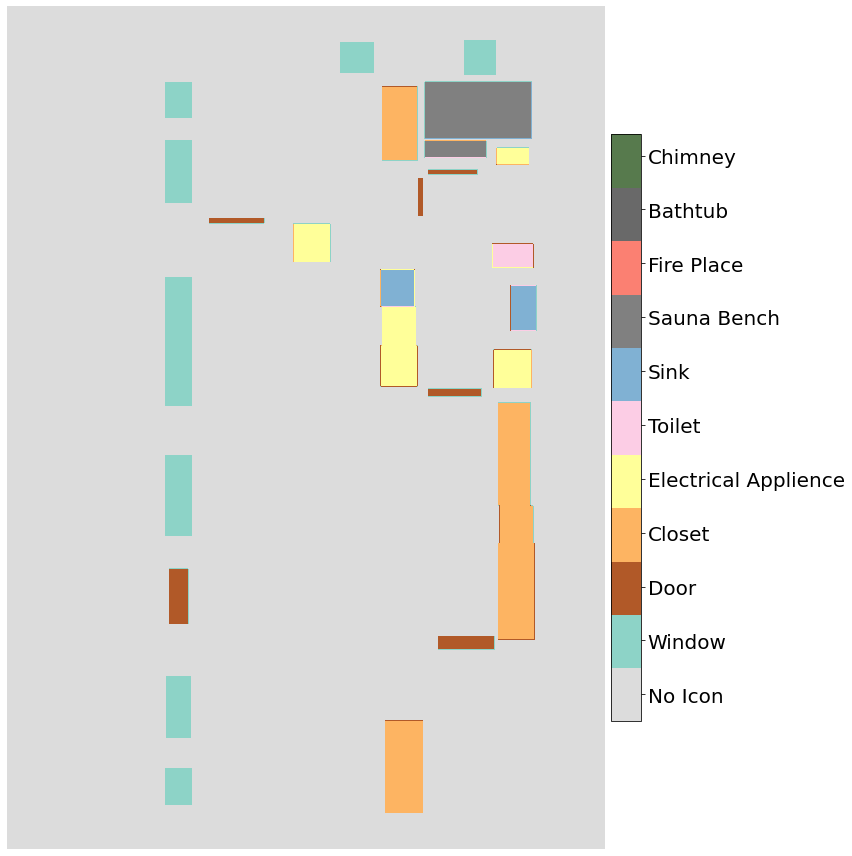

In [22]:
heatmaps, rooms, icons = split_prediction(prediction, img_size, split)
polygons, types, room_polygons, room_types = get_polygons((heatmaps, rooms, icons), 0.2, [1, 2])

pol_room_seg, pol_icon_seg = polygons_to_image(polygons, types, room_polygons, room_types, height, width)
plt.figure(figsize=(12,12))
ax = plt.subplot(1, 1, 1)
ax.axis('off')
rseg = ax.imshow(pol_room_seg, cmap='rooms', vmin=0, vmax=n_rooms-0.1)
cbar = plt.colorbar(rseg, ticks=np.arange(n_rooms) + 0.5, fraction=0.046, pad=0.01)
cbar.ax.set_yticklabels(room_classes, fontsize=20)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12,12))
ax = plt.subplot(1, 1, 1)
ax.axis('off')
iseg = ax.imshow(pol_icon_seg, cmap='icons', vmin=0, vmax=n_icons-0.1)
cbar = plt.colorbar(iseg, ticks=np.arange(n_icons) + 0.5, fraction=0.046, pad=0.01)
cbar.ax.set_yticklabels(icon_classes, fontsize=20)
plt.tight_layout()
plt.show()

## Ground truth and prediction comparisons

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  del sys.path[0]


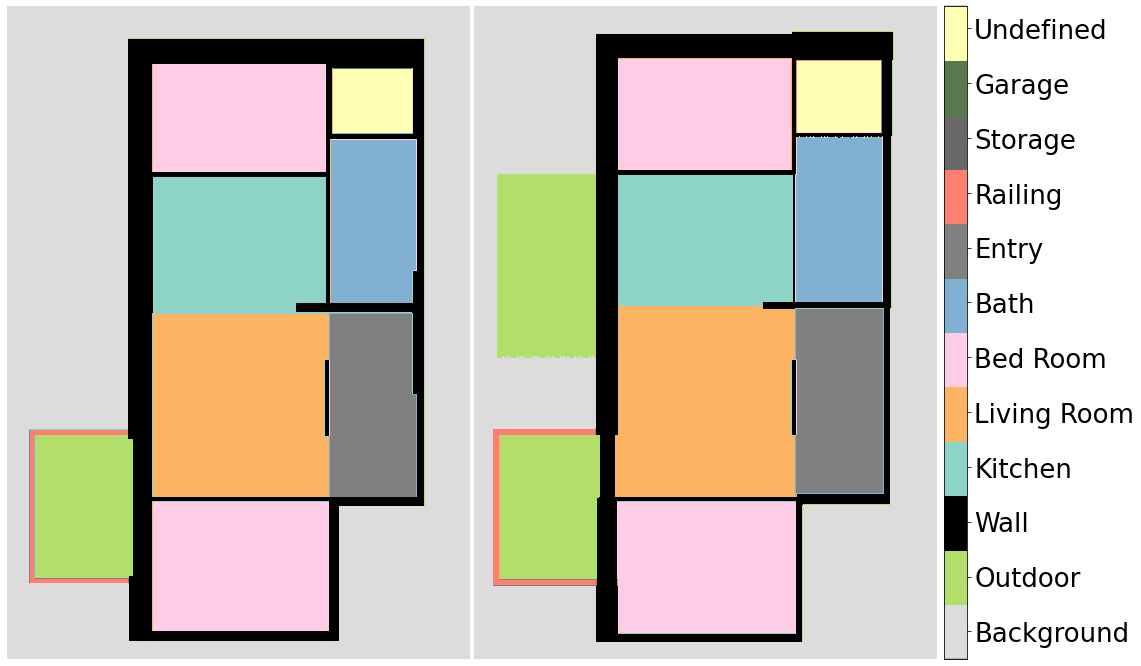

In [23]:
fig = plt.figure(figsize=(26, 12))
grid = AxesGrid(fig, 111,
                nrows_ncols=(1, 2),
                axes_pad=0.05,
                cbar_mode='single',
                cbar_location='right',
                cbar_pad=0.1
                )
images = [label_np[0], pol_room_seg]
for i, ax in enumerate(grid):
    ax.set_axis_off()
    im = ax.imshow(images[i], cmap='rooms', vmin=0, vmax=n_rooms-0.1)
cbar = ax.cax.colorbar(rseg, ticks=np.arange(n_rooms) + 0.5)
cbar.ax.set_yticklabels(room_classes, fontsize=26)
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  from ipykernel import kernelapp as app


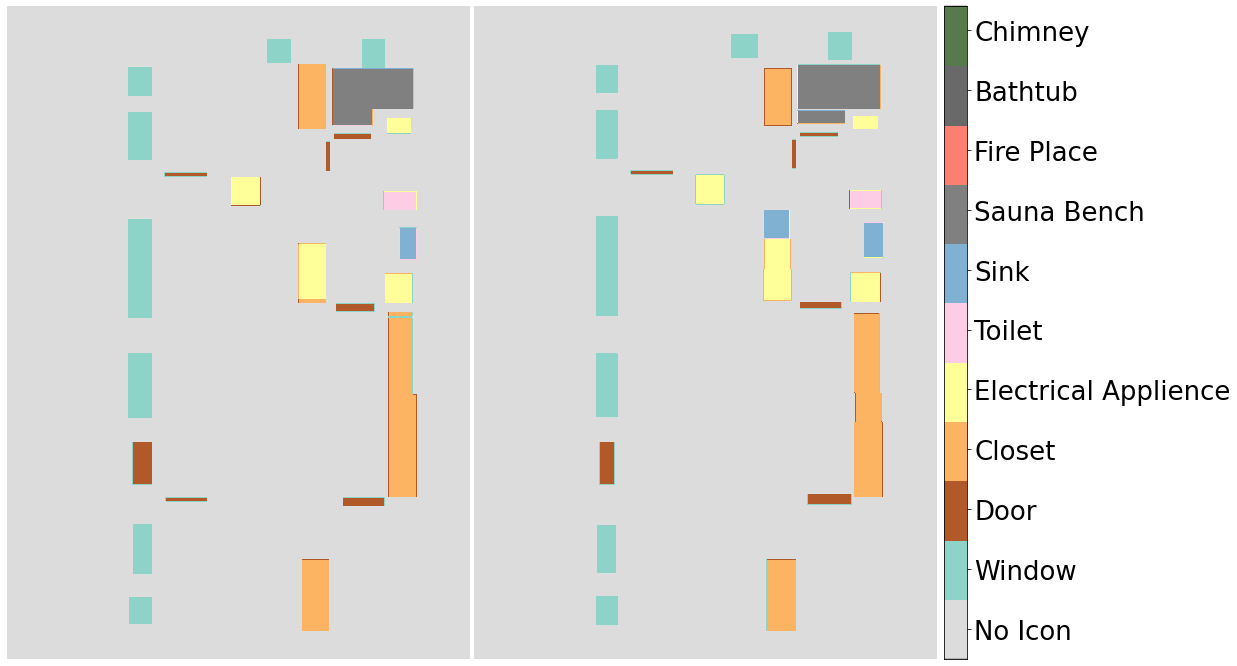

In [24]:
fig = plt.figure(figsize=(26, 12))
grid = AxesGrid(fig, 111,
                nrows_ncols=(1, 2),
                axes_pad=0.05,
                cbar_mode='single',
                cbar_location='right',
                cbar_pad=0.1
                )

images = [label_np[1], pol_icon_seg]
for i, ax in enumerate(grid):
    ax.set_axis_off()
    im = ax.imshow(images[i], cmap='icons', vmin=0, vmax=n_icons-0.1)

cbar = ax.cax.colorbar(iseg, ticks=np.arange(n_icons) + 0.5)
cbar.ax.set_yticklabels(icon_classes, fontsize=26)
plt.show()